In [23]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import pandas as pd
import math
import statistics
import h5py
import pickle

In [91]:
higgs_data = open("higgs_100000_pt_250_500.pkl",'rb')
higgs = pickle.load(higgs_data)

higgs.keys()

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')

In [76]:
#QCD - Quantim Chromodynamics (irreducible noise)
#Higgs - particle (m = 125GeV)

#GENERAL VARIABLES
#pt - transverse momentum (momentum component perpendicular to beam direction)
#eta- pseudorapidity (angle relative to beam, zero.angle = inf.eta, pi/2.angle = zero.eta)
#phi - azimuthal angle about beam
#DeltaR - angular seperation, sqrt(d.eta2 + d.phi2)
#     "The angular separation between Higgs boson decay products can be approximated as ∆R ≈2mH /pT"

#JET SUBSTRUCTURE VARIABLES
#KtDeltaR - DeltaR of two subjects within the large-R jet (defined earlier in paper)
#t_n (tau_n) - n-subjettiness (number of axes)
#t_nm (tau) - tn/tm

In [76]:
qcd_data = open("qcd_100000_pt_250_500.pkl",'rb')
qcd = pickle.load(qcd_data)

qcd.keys()

# to call a column
#qcd['eta']

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')

Lab 5b. Explore the training data by addressing following questions:

   1. Do all features provide discrimination power between signal and background?
   2. Are there correlations among these features?
   3. Compute expected discovery sensitivity by normalizing each sample appropriately.
   4. Develop a plan to optimize the discovery sensitivity by applying selections to these features.



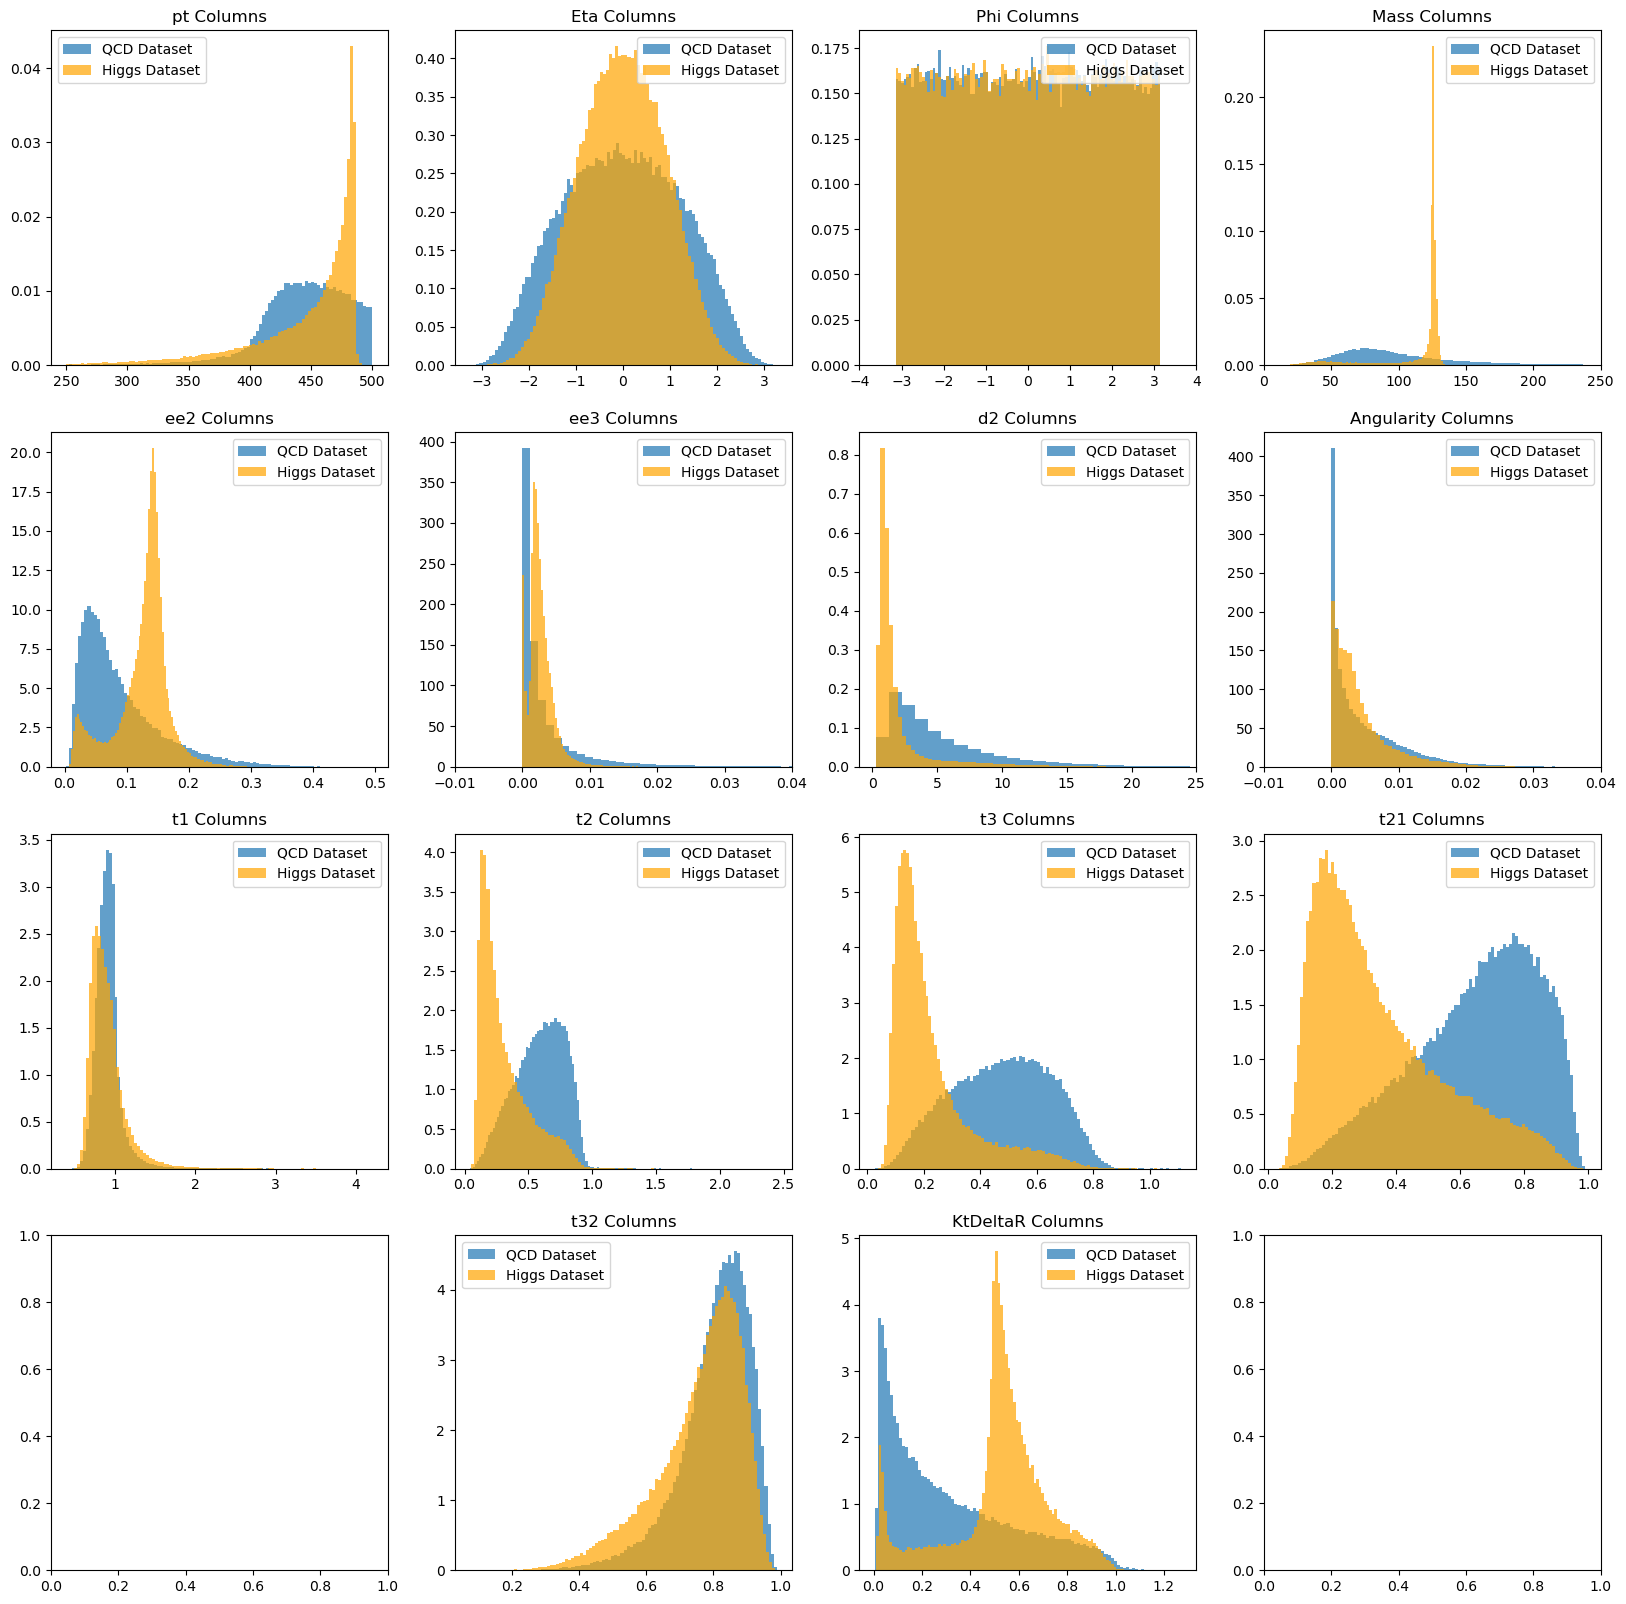

In [124]:
fig, ax = plt.subplots(nrows =4, ncols = 4, figsize = (20,20))


ax[0,0].hist(qcd['pt'], 100, alpha = 0.7, label = 'QCD Dataset', density = True)
ax[0,0].hist(higgs['pt'], 100, color = 'orange', alpha = 0.7, label = 'Higgs Dataset', density = True)
ax[0,0].legend()
ax[0,0].set_title('pt Columns')

ax[0,1].hist(qcd['eta'], 100, alpha = 0.7, label = 'QCD Dataset', density = True)
ax[0,1].hist(higgs['eta'], 100, color = 'orange', alpha = 0.7, label = 'Higgs Dataset', density = True)
ax[0,1].legend()
ax[0,1].set_title('Eta Columns')

ax[0,2].hist(qcd['phi'], 100, alpha = 0.7, label = 'QCD Dataset', density = True)
ax[0,2].hist(higgs['phi'], 100, color = 'orange', alpha = 0.7, label = 'Higgs Dataset', density = True)
ax[0,2].legend()
ax[0,2].set_xlim(-4,4)
ax[0,2].set_title('Phi Columns')

ax[0,3].hist(qcd['mass'], 100, alpha = 0.7, label = 'QCD Dataset', density = True)
ax[0,3].hist(higgs['mass'], 100, color = 'orange', alpha = 0.7, label = 'Higgs Dataset', density = True)
ax[0,3].legend()
ax[0,3].set_xlim(0,250)
ax[0,3].set_title('Mass Columns')

ax[1,0].hist(qcd['ee2'], 100, alpha = 0.7, label = 'QCD Dataset', density = True)
ax[1,0].hist(higgs['ee2'], 100, color = 'orange', alpha = 0.7, label = 'Higgs Dataset', density = True)
ax[1,0].legend()
ax[1,0].set_title('ee2 Columns')

ax[1,1].hist(qcd['ee3'], 100, alpha = 0.7, label = 'QCD Dataset', density = True)
ax[1,1].hist(higgs['ee3'], 100, color = 'orange', alpha = 0.7, label = 'Higgs Dataset', density = True)
ax[1,1].set_xlim(-0.01,0.04)
ax[1,1].legend()
ax[1,1].set_title('ee3 Columns')

ax[1,2].hist(qcd['d2'], 100, alpha = 0.7, label = 'QCD Dataset', density = True)
ax[1,2].hist(higgs['d2'], 100, color = 'orange', alpha = 0.7, label = 'Higgs Dataset', density = True)
ax[1,2].legend()
ax[1,2].set_xlim(-1,25)
ax[1,2].set_title('d2 Columns')

ax[1,3].hist(qcd['angularity'], 100, alpha = 0.7, label = 'QCD Dataset', density = True)
ax[1,3].hist(higgs['angularity'], 100, color = 'orange', alpha = 0.7, label = 'Higgs Dataset', density = True)
ax[1,3].legend()
ax[1,3].set_xlim(-0.01,0.04)
ax[1,3].set_title('Angularity Columns')

ax[2,0].hist(qcd['t1'], 100, alpha = 0.7, label = 'QCD Dataset', density = True)
ax[2,0].hist(higgs['t1'], 100, color = 'orange', alpha = 0.7, label = 'Higgs Dataset', density = True)
ax[2,0].legend()
ax[2,0].set_title('t1 Columns')

ax[2,1].hist(qcd['t2'], 100, alpha = 0.7, label = 'QCD Dataset', density = True)
ax[2,1].hist(higgs['t2'], 100, color = 'orange', alpha = 0.7, label = 'Higgs Dataset', density = True)
ax[2,1].legend()
ax[2,1].set_title('t2 Columns')

ax[2,2].hist(qcd['t3'], 100, alpha = 0.7, label = 'QCD Dataset', density = True)
ax[2,2].hist(higgs['t3'], 100, color = 'orange', alpha = 0.7, label = 'Higgs Dataset', density = True)
ax[2,2].legend()
ax[2,2].set_title('t3 Columns')

ax[2,3].hist(qcd['t21'], 100, alpha = 0.7, label = 'QCD Dataset', density = True)
ax[2,3].hist(higgs['t21'], 100, color = 'orange', alpha = 0.7, label = 'Higgs Dataset', density = True)
ax[2,3].legend()
ax[2,3].set_title('t21 Columns')

ax[3,1].hist(qcd['t32'], 100, alpha = 0.7, label = 'QCD Dataset', density = True)
ax[3,1].hist(higgs['t32'], 100, color = 'orange', alpha = 0.7, label = 'Higgs Dataset', density = True)
ax[3,1].legend()
ax[3,1].set_title('t32 Columns')

ax[3,2].hist(qcd['KtDeltaR'], 100, alpha = 0.7, label = 'QCD Dataset', density = True)
ax[3,2].hist(higgs['KtDeltaR'], 100, color = 'orange', alpha = 0.7, label = 'Higgs Dataset', density = True)
ax[3,2].legend()
ax[3,2].set_title('KtDeltaR Columns')
plt.show()

### 1) Do all of the features provide discrimination power between signal and background? 

#### No, there are many plots in which the entire range of the signal dataset is completely within the background data set with sizeable margins. This produces a difficult situation in which a significant sigma value cannot be calculated with any signal no matter the strength. This data set will require cross-examining using other variables in order to piece together a significant measurement. Parameters for this are explained in provided literature.

### 2) Are there correlations among these features? 

#### This question is quite broad so I try to will answer a couple interpretations. 
#### There are at times correlations between signal and background that will make it difficult to seperate the two for a significant measurement. There are also correlations between variables such as the Tau terms, in which the t_xy variables are mathematically derived from the t_x variables. And in a larger, very general sense, many of these features are correlated due to the particle physics associated with the interractions, thus relationships can be leveraged in helping to determine significant measurements.

### 3) Compute the expected discovery sensitivity (significance of the expected signal) by normalizing each sample appropriately (see 'expected yields' below). 

In [3]:
# given NHiggs/(√NQCD)

N_higgs = 100
N_qcd = 20000

dis_sen = N_higgs/(N_qcd**(1/2))
print ('Discovery Sensitivity: ' +str(dis_sen))

Discovery Sensitivity: 0.7071067811865475


### 4) Develop a plan to optimize the discovery sensitivity by applying selections to these features. 

#### I have read through the literature once and was able to notice many parameters given to isolate significant measurements of the higgs. I will now have to read the literature once again after now becoming familiar with the variables, learning the vocabulary, and building an understanding of the experiment with intent to gather the parameters and relationships to leverage the data towards findings.

#### My plan is to combine the significance of multiple related signals in which to produce a significant measurement. At this point, I believe this will entail bounding datasets according to literature and calculations determined by related variables.